# Variational Quantum Eigensolver Implemented on a 1D Quantum Harmonic Oscillator (2024)
By John Samuel Suico

Last edited: January 27 2024
***
## Table of Contents
1. [Introduction](#VQE0)
2. [Hamiltonian Construction and Representation](#VQE1)
    1. [Position Basis](#VQE1.1)
    2. [Energy Basis](#VQE1.2)
3. [Hamiltonian Decomposition](#VQE2)
    1. [The `h2zixy` function](#VQE2.1)
    2. [Trace as Inner Product](#VQE2.2)
4. [Ansatz State and Preparation](#VQE3)
    1. [2-Qubit Hardware Efficient Ansatz](#VQE3.1)
    2. [Universal 2-Qubit Ansatz](#VQE3.2)
    3. [4-Qubit Ansatz](#VQE3.3)
5. [Measurement and Optimization](#VQE4)
6. [Sample Runs](#VQE5)
7. [Main References](#Bibliography)

## Introduction <a name="VQE0"></a>

The development of quantum computation and quantum information science has a history rooted in the interest and need for new paradigms of computation to describe processes that are quantum-mechanical by nature \cite{nielsenquantum2010}. Take quantum entanglement as a case in point: conventional computers fall short in simulating this key aspect of quantum mechanics which has no classical analog \cite{brooksquantum2019, preskillquantum2018}. This example showcases how quantum computers offer different ways of handling information outside the realm of current classical frameworks of computation. Some notable examples where quantum algorithms outshine their classical counterparts include Shor's algorithm for prime factorization and Grover's algorithm for unstructured search problems \cite{shoralgorithms1994, groverfast1996}.
	
The fundamental unit of quantum information is called the qubit. Qubits are analogous to classical bits of information in the sense that both are two-state systems, with the distinction that qubits can exist as a \textit{superposition} of states. We can write down the state vector of an arbitrary qubit $\ket{\psi}$ as a linear combination of the \textit{computational basis} states:
\begin{equation}
	\label{eq:qubit}
	\ket{\psi} = \alpha\ket{0} + \beta\ket{1}
\end{equation}
, where $\{\alpha, \beta\} \in \mathbb{C}$ with the normalization constraint $|\alpha|^2 + |\beta|^2 = 1$. That is, qubits act as vectors in a two-dimensional complex vector space spanned by the orthonormal basis $\{\ket{0},\ket{1}\}$ \cite{nielsenquantum2010}. Qubits are physically realizable through two-state quantum systems, such as two different photon polarization states or ground and excited states of an electron within an atom. This property of superposition allows us to encode $2^n$ bits of classical information into $n$ qubits. 
	
Rapid progress over recent years have brought about quantum computers equipped with 50 or more qubits allowing a physical demonstration of how classical computers are exponentially outstripped for certain computational tasks \cite{arutequantum2019}. This heralds the era of Noisy Intermediate Scale Quantum (NISQ) devices, where the increase in available computational resources due to a larger state space and quantum-information specific methods is limited by error-prone qubit operations. This is due to the lack of robust error-correction schemes owing to the small number of available qubits \cite{preskillquantum2018}. Although the limited number of qubits places a constraint on the current tasks we can perform on a quantum computer, a large number of algorithms have been developed and implemented within said limitations with applications in topics such as quantum chemistry, machine learning, and combinatorial optimization \cite{bhartinoisy2022}. Some of these applications employ a hybrid approach suitable for current and near-term quantum computing architectures, wherein different parts of the algorithm are run on a quantum and a classical computer.
	
The variational quantum eigensolver (VQE) \cite{peruzzovariational2014}, based on the variational principle of quantum mechanics, is an example of such a hybrid algorithm. First proposed and implemented by Peruzzo et al., the VQE approximates the ground state energy of a quantum system by iteratively optimizing a parametrized wave function called an ansatz. In particular, the expectation value of the system's Hamiltonian is evaluated on a quantum computer while the parameters of the ansatz are optimized using a conventional computer. The VQE poses the advantage that it can be run on any quantum device and that the algorithmic design has a modular structure which allows various changes in either state preparation, Hamiltonian construction, measurement strategies, and classical optimization methods to accomodate limitations placed by hardware or problem-specific constraints \cite{ mccleantheory2016, tillyvariational2022}. While it was first experimentally demonstrated to solve the ground state energy of $\ce{HeH^+}$ using a two-qubit photonic chip, the VQE has since then been implemented using other quantum architectures (e.g. ion traps, superconducting qubits, cloud computing) to estimate ground state energies for other molecules (e.g., $\ce{H_2}, \ce{LiH}, \ce{BeH_2}$, amino acids) \cite{caoquantum2019, robertresourceefficient2021}.
	
This study aims to use the VQE to calculate the ground state energy of the one-dimensional (1D) quantum harmonic oscillator (QHO) with the same methods employed by Miceli and McGuigan using the IBM Qiskit software development kit (SDK) for gate-based quantum computing \cite{miceliquantum2018}. Their paper focused on studying the spectrum of harmonic oscillator systems generated using a formalism based on discrete quantum mechanics with the goal of providing a framework to translate other systems for the VQE. This study aims to provide a more in depth discussion of the VQE algorithm while focusing solely on the 1D QHO. Comparison with classical methods will not be carried out as a limitation of the study due to the small size of the systems of interest.
	
The structure of this thesis is as follows: Chapter 2 provides a background of the 1D quantum harmonic oscillator and how it is commonly treated as a canonical textbook problem. Chapter 3 provides an overview of the VQE and explains the principles behind the variational algorithm. Chapter 4 details the specific methods used to explore the problem. The obtained results are discussed in Chapter 5. The study is summarized and concluded in Chapter 6 along with possible suggestions.

## Hamiltonian Construction <a name="VQE1"></a>
The first paragraph tex

### To delete <a name="subparagraph1"></a>
This is a sub paragraph, formatted in heading 3 style

## Hamiltonian Decomposition <a name="VQE2"></a>
The second paragraph text

## Ansatz State and Preparation <a name = "VQE3"></a>

## Measurement and Optimization <a name = "VQE4"></a>

## Sample Runs <a name = "VQE5"></a>

## Main Referenceces <a name = "Bibliography">

In [2]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, BasicAer, execute
from qiskit.visualization import circuit_drawer
from qiskit.circuit import Parameter
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import itertools
import random
import time
    
def ell(i,n):
    """Returns the index of the ith site for a lattice with n sites""" 
    return (2*i - 1 - n)/2

#discrete fourier transform
def DFT(n):
    """Returns the discrete fourier transform for n lattice sites"""
    F = []
    for j in range(1,n+1):
        F_row = []
        for k in range(1,n+1):
            F_row.append((1/np.sqrt(n)) * np.exp((2*np.pi*1j*ell(j,n)*ell(k,n)) / n ))
        F.append(F_row)
    F = np.matrix(np.round(F,10))
    return F

#position operator
def X_pos(n):
    """Returns the discrete position operator for n lattice sites"""
    X = []
    for j in range(1,n+1):
        X_row = []
        for k in range(1,n+1):
            if j==k:
                 X_row.append(np.sqrt(2*np.pi/n) * ell(j,n))
            else:
                X_row.append(0)
        X.append(X_row)
    return np.matrix(np.round(X,10))

def P_pos(n):
    """Returns the discrete momentum operator for n lattice sites"""
    F = DFT(n)
    X_op = X_pos(n)
    F_dag = F.H
    return np.round((F_dag*X_op*F),10)


def A_minus(n):
    """Returns the discrete annihilation operator for n energy levels"""
    A = []
    for j in range(1,n+1):
        A_row = []
        for k in range(1,n+1):
            if j == (k-1):
                A_row.append(np.sqrt(j))
            else:
                A_row.append(0)
        A.append(A_row)
    return np.matrix(A)


def A_plus(n):
    """Returns the discrete creation operator for n energy levels"""
    A = []
    for j in range(1,n+1):
        A_row = []
        for k in range(1,n+1):
            if j == (k+1):
                A_row.append(np.sqrt(k))
            else:
                A_row.append(0)
        A.append(A_row)
    return np.matrix(A)

def QHO(n,basis):
    """Returns the discrete 1D QHO of size n constructed in chosen basis"""
    if basis == 'pos':
        X_op = X_pos(n)
        P_op = P_pos(n)
        H = (X_op*X_op)/2 + (P_op*P_op)/2
        return H
    elif basis == 'en':
        A_dag = A_minus(n)
        A_undag = A_plus(n)
        H = (A_dag*A_undag) + np.identity(n)/2
        return H

In [2]:
def exactE(n):
    """Returns exact energy levels of a 1D QHO up to the nth level"""
    E = []
    for i in range(0,n):
        E.append(i+1/2)
    return E

def compareSpect(n):
    """Compares discrete and continuous eigenspectrum of a 1D QHO for n values"""
    H_pos = QHO(n,'pos')
    H_en = QHO(n,'en')
    e_pos, v_pos = np.linalg.eig(H_pos)
    e_en, v_en = np.linalg.eig(H_en)      
    
    E = exactE(n)  
    e_exact = np.arange(1,n+1,1)
    
    plt.rcParams["font.family"] = "Times New Roman"
    fig, ax = plt.subplots(1,1,figsize=(6,5))
    ax.scatter(e_exact, np.sort(e_pos), s=20, c="#1f77b4",
               label="position basis", marker="o")
    ax.scatter(e_exact, np.sort(e_en), s=20, c="#ff7f0e", 
               label="energy basis", marker="v")
    ax.plot(e_exact, E, c ="#2ca02c", label="exact")
    ax.set_xlabel("Eigenvalue")
    ax.set_ylabel("Energy")
    ax.legend()
    plt.savefig("genFigs/compareSpectrum.png", dpi=600)
    plt.show()

In [3]:
compareSpect(64)

C:\Users\johns\anaconda3\envs\qiskit\Lib\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


In [4]:
def h2zixy(ham):
    """Decompose square real symmetric matrix into Pauli spin matrices 
    
    Parameters:
    ham (array) - a square numpy real symmetric numpy array
    
    Returns:
    a dictionary of Pauli string keys with weights as values
    """

    # weights smaller than eps are taken to be zero
    eps = 1.e-5
    
    dim = len(ham)
    
    # Step 1: expand Hamiltonian to have leading dimension = power of 2 and
    # pad with zeros if necessary

    NextPowTwo = int(2**np.ceil(np.log(dim)/np.log(2)))
    if NextPowTwo != dim:
        diff = NextPowTwo - dim
        ham = np.hstack((ham, np.zeros((dim,diff))))
        dim = NextPowTwo
        ham = np.vstack((ham, np.zeros((diff,dim))))
    
    # Step 2: generate all tensor products of the appropriate length with
    # all combinations of I, X, Y, Z, excluding those with an odd number of Y
    # matrices
    
    # Pauli is a dictionary with the four basis 2x2 Pauli matrices
    Pauli = {'I' : np.array([[1,0],[0,1]]),
             'X' : np.array([[0,1],[1,0]]),
             'Y' : np.array([[0,-1j],[1j,0]]),
             'Z' : np.array([[1,0],[0,-1]])}
    NumTensorRepetitions = int(np.log(dim) / np.log(2))
    PauliKeyList = []
    KeysToDelete = []
    PauliDict = {}
    
    def PauliDictValues(l):
        # returns a generator object, such that calling again yields the next object
        yield from itertools.product(*([l] * NumTensorRepetitions))
    

    # generate list of tensor products with all combinations of Pauli
    # matrices i .e. 'III', 'IIX', 'IIY', etc.
    for x in PauliDictValues('IXYZ'):
        PauliKeyList.append(''.join(x))
    
    for y in PauliKeyList:
        PauliDict[y] = 0
        
    for key in PauliDict:
        TempList = []
        PauliTensors = []
        NumYs = key.count('Y')
        TempKey = str(key)
    
        if (NumYs % 2) == 0:
            for string in TempKey:
                TempList.append(string)
            
            for SpinMatrix in TempList:
                PauliTensors.append(Pauli[SpinMatrix])
            
            PauliDict[key] = PauliTensors
            CurrentMatrix = PauliDict[key].copy()

            # compute tensor product between I , X , Y , Z matrices
            for k in range(1, NumTensorRepetitions):
                TemporaryDict = np.kron(CurrentMatrix[k-1], CurrentMatrix[k])
                CurrentMatrix[k] = TemporaryDict
        
            PauliDict[key] = CurrentMatrix[-1]
        
        else:
            KeysToDelete.append(key)
    
    for val in KeysToDelete:
        PauliDict.pop(val)
    
    # Step 3: loop through all the elements of the Hamiltonian matrix
    # and identify which Pauli matrix combinations contribute;
    # generate a matrix of simultaneous equations that need to be solved;
    # N.B. upper triangle of hamiltonian array is used  

    VecHamElements = np.zeros(int((dim**2 + dim) / 2))
    h=0
    for i in range(0,dim):
        for j in range(i,dim):
            arr = []
            VecHamElements[h] = ham[i,j]
            for key in PauliDict:
                TempVar = PauliDict[key]
                arr.append(TempVar[i,j].real)
            if i == 0 and j == 0:
                FinalMat = np.array(arr.copy())
            else:
                FinalMat = np.vstack((FinalMat,arr))
            
            h += 1
    
    # Step 4: use numpy.linalg.solve to solve the simultaneous equations
    # and return the weights of the Pauli strings

    x = np.linalg.solve(FinalMat,VecHamElements)
    var_list = list(PauliDict.keys())
    
    # return final Pauli decomposition of the Hamiltonian
    decHam = {}
    for i in range(len(PauliDict)):
        if abs(x[i])>eps:
            decHam[str(var_list[i])] = np.round(x[i],4)
            
    return decHam

In [5]:
print("4x4 Energy Basis Hamiltonian: ", h2zixy(QHO(4,"en")))
print("4x4 Position Basis Hamiltonian: ", h2zixy(QHO(4,"pos")))

4x4 Energy Basis Hamiltonian:  {'II': 2.0, 'IZ': 0.5, 'ZZ': -1.0}
4x4 Position Basis Hamiltonian:  {'II': 1.9635, 'IX': -0.5554, 'YY': -0.5554, 'ZZ': 0.7854}


C:\Users\johns\AppData\Local\Temp\ipykernel_15844\2746396555.py:92: ComplexWarning: Casting complex values to real discards the imaginary part
  VecHamElements[h] = ham[i,j]


In [3]:
def Measurement(quantumcircuit, **kwargs):
    """Executes measurements of a QuantumCircuit object 
    
    Parameters:
    quantumcircuit (object) - a QuantumCircuit object to be measured
    
    Keyword Arguments:
    shots (integer) - number of trials to execute for the measurement(s)
    return_M (Bool) - indicates whether to return dictionary of measurement
        results
    print_M (Bool) - indicates whether to print measurement (flipped) results
    column (Bool) - indicates whether to print measurement (flipped) results
        in a vertical column
    """

    # default kwargs
    p_M = True
    Shots=1
    ret = False
    NL = False
    if 'shots' in kwargs:
        Shots = int(kwargs['shots'])
    if 'return_M' in kwargs:
        ret = kwargs['return_M']
    if 'print_M' in kwargs:
        p_M = kwargs['print_M']
    if 'column' in kwargs:
        NL = kwargs['column']
    M1 = execute(quantumcircuit, BasicAer.get_backend('qasm_simulator'),
                 shots=Shots).result().get_counts(quantumcircuit)
    M2 = {}
    k1 = list(M1.keys())
    v1 = list(M1.values())
    for k in np.arange(len(k1)):
        key_list = list(k1[k])
        new_key = ''
        for j in np.arange(len(key_list)):
            new_key = new_key+key_list[len(key_list)-(j+1)]
        M2[new_key] = v1[k]
    if(p_M):
        k2 = list(M2.keys())
        v2 = list(M2.values())
        measurements = ''
        for i in np.arange( len(k2) ):
            m_str = str(v2[i])+'|'
            for j in np.arange(len(k2[i])): 
                if( k2[i][j] == '0' ):
                    m_str = m_str+'0'
                if( k2[i][j] == '1' ):
                    m_str = m_str+'1'
                if( k2[i][j] == ' ' ):
                    m_str = m_str+'>|'
            m_str = m_str+'> '
            if(NL):
                m_str = m_str + '\n'
            measurements = measurements + m_str
        print(measurements)
    if(ret):
        return M2   
    
def Two_Qubit_HEA(qc, params):
    """Applies rotation and entangling gates for a 2-qubit HEA state

    Parameters:
    qc (QuantumCircuit) - the quantum circuit to be measured
    params (array) - contains 8 parameters for current iteration
    """

    qc.ry(params[0], 0)
    qc.rz(params[1], 0)
    qc.ry(params[2], 1)
    qc.rz(params[3], 1)
    qc.cx(0,1)
    qc.ry(params[4], 0)
    qc.rz(params[5], 0)
    qc.ry(params[6], 1)
    qc.rz(params[7], 1)

def Two_Qubit_UniversalAnsatz(qc, params):
    """Applies rotation and entangling gates for a universal 2-qubit ansatz
        state

    Parameters:
    qc (QuantumCircuit) - the quantum circuit to be measured
    params (array) - contains 16 parameters for current iteration
    """

    qc.ry(params[0], 0)
    qc.rz(params[1], 0)
    qc.ry(params[2], 1)
    qc.rz(params[3], 1)
    qc.cx(0,1)
    qc.ry(params[4], 0)
    qc.rz(params[5], 0)
    qc.ry(params[6], 1)
    qc.rz(params[7], 1)
    qc.cx(1,0)
    qc.ry(params[8], 0)
    qc.rz(params[9], 0)
    qc.ry(params[10], 1)
    qc.rz(params[11], 1)
    qc.cx(0,1)
    qc.ry(params[12], 0)
    qc.rz(params[13], 0)
    qc.ry(params[14], 1)
    qc.rz(params[15], 1)
    
def Four_Qubit_HEA(qc, params):
    """Applies rotation and entangling gates for a universal 2-qubit ansatz
        state

    Parameters:
    qc (QuantumCircuit) - the quantum circuit to be measured
    params (array) - contains 16 parameters for current iteration
    """
    qc.ry(params[0], 0)
    qc.rx(params[1], 1)
    qc.ry(params[2], 2)
    qc.rx(params[3], 3)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.cx(2,3)
    qc.barrier()
    qc.ry(params[4], 0)
    qc.rx(params[5], 1)
    qc.ry(params[6], 2)
    qc.rx(params[7], 3)
    qc.cx(1,0)
    qc.cx(2,3)
    qc.cx(1,2)
    qc.barrier()
    qc.ry(params[8], 0)
    qc.rx(params[9], 1)
    qc.ry(params[10], 2)
    qc.rx(params[11], 3)
    qc.cx(0,1)
    qc.cx(1,2)
    qc.cx(2,3)
    qc.barrier()
    qc.ry(params[12], 0)
    qc.rx(params[13], 1)
    qc.ry(params[14], 2)
    qc.rx(params[15], 3)

def VQE_EV(params, Ansatz, H, **kwargs):
    """Computes and returns the expectation value of a Hamiltonian
        for some parametrized ansatz

    Parameters:
    params (array) - parameters for ansatz
    Ansatz (object) - type of ansatz to be used for measurement
    H (dictionary) - Pauli strings as keys and weights as values
    Keyword Arguments:
    shots (integer) - number of measurements to use per computation
    """

    Shots = 1000
    if 'shots' in kwargs:
        Shots = int(kwargs['shots'])
    Hk = list( H.keys() )
    H_EV = 0
    for k in np.arange( len(Hk) ):
        L = list( Hk[k] )
        q = QuantumRegister(len(L))
        c = ClassicalRegister(len(L))
        qc = QuantumCircuit(q,c)
        Ansatz( qc, params )
        for l in np.arange( len(L) ):
            if( L[l] == 'X' ):
                qc.ry(-np.pi/2,q[int(l)])
                qc.measure(int(l),int(l))
            if( L[l] == 'Y' ):
                qc.rx( np.pi/2,q[int(l)])
                qc.measure(int(l),int(l))
            if( L[l] == 'Z' ):
                qc.measure(int(l),int(l))
        M = Measurement( qc, shots=Shots, print_M=False, return_M=True )
        Mk = list( M.keys() )
        H_ev = 0
        for m1 in np.arange(len(Mk)):
            MS = list( Mk[m1] )
            e = 1
            for m2 in np.arange(len(MS)):
                if( MS[m2] == '1'):
                    e = e*(-1)
            H_ev = H_ev + e * M[Mk[m1]]
        H_EV = H_EV + H[Hk[k]]*H_ev/Shots
    return H_EV

def Nelder_Mead(H, Ansatz, Vert, Val):
    """Computes and appends values for the next step in the Nelder-Mead
        optimization algorithm

    Parameters:
    H (dictionary) - Pauli strings as keys and weights as values
    Ansatz (function) - chosen ansatz to measure Pauli strings
    Vert (array) - contains vertices forming the simplex
    Val (array) - contains measurements over each vertex
    """
    alpha = 2
    gamma = 2
    rho   = 0.5
    sigma = 0.5
    add_reflect = False
    add_expand = False
    add_contract = False
    shrink = False
    add_bool = False
#----------------------------------------
    # gets value / index of largest point
    hi = Calculate_MinMax( Val,'max' )
    # gets value / index of all points not the largest
    Vert2 = []
    Val2 = []
    for i in np.arange(len(Val)):
        if( int(i) != hi[1] ):
            Vert2.append( Vert[i] )
            Val2.append( Val[i] )
    Center_P = Compute_Centroid(Vert2)
    Reflect_P = Reflection_Point(Vert[hi[1]],Center_P,alpha)
    #gets expectation value at Reflection Point
    Reflect_V = VQE_EV(Reflect_P,Ansatz,H)
#------------------------------------------------- 
# determine if: reflect / expand / contract / shrink
    hi2 = Calculate_MinMax( Val2,'max' ) # worst
    lo2 = Calculate_MinMax( Val2,'min' ) # best
    if( hi2[0] > Reflect_V >= lo2[0] ):
        add_reflect = True
    elif( Reflect_V < lo2[0] ):
        Expand_P = Reflection_Point(Center_P,Reflect_P,gamma)
        Expand_V = VQE_EV(Expand_P,Ansatz,H)
        if( Expand_V < Reflect_V ):
            add_expand = True
        else:
            add_reflect = True
    elif( Reflect_V > hi2[0] ):
        if( Reflect_V < hi[0] ):
            Contract_P = Reflection_Point(Center_P,Reflect_P,rho)
            Contract_V = VQE_EV(Contract_P,Ansatz,H)
            if( Contract_V < Reflect_V ):
                add_contract = True
            else:
                shrink = True
        else:
            Contract_P = Reflection_Point(Center_P,Vert[hi[1]],rho)
            Contract_V = VQE_EV(Contract_P,Ansatz,H)
            if( Contract_V < Val[hi[1]] ):
                add_contract = True
            else:
                shrink = True
#-------------------------------------------------
 # apply: reflect / expand / contract / shrink
    if( add_reflect == True ):
        new_P = Reflect_P
        new_V = Reflect_V
        add_bool = True
    elif( add_expand == True ):
        new_P = Expand_P
        new_V = Expand_V
        add_bool = True
    elif( add_contract == True ):
        new_P = Contract_P
        new_V = Contract_V
        add_bool = True
    if( add_bool ):
        del Vert[hi[1]]
        del Val[hi[1]]
        Vert.append( new_P )
        Val.append( new_V )
    if( shrink ):
        Vert3 = []
        Val3 = []
        lo = Calculate_MinMax( Val,'min' )
        Vert3.append( Vert[lo[1]] )
        Val3.append( Val[lo[1]] )
        for j in np.arange( len(Val) ):
            if( int(j) != lo[1] ):
                Shrink_P = Reflection_Point(Vert[lo[1]],Vert[j],sigma)
                Vert3.append( Shrink_P )
                Val3.append( VQE_EV(Shrink_P,Ansatz,H) )
        for j2 in np.arange( len(Val) ):
            del Vert[0]
            del Val[0]
            Vert.append( Vert3[j2] )
            Val.append( Val3[j2] )

def Calculate_MinMax(V, C_type):
    """Returns the smallest or biggest value / index in an array"""
    if( C_type == 'min' ):
        lowest = [V[0],0]
        for i in np.arange(1,len(V)):
            if( V[i] < lowest[0] ):
                lowest[0] = V[i]
                lowest[1] = int(i)
        return lowest
    if( C_type == 'max' ):
        highest = [V[0],0]
        for i in np.arange(1,len(V)):
            if( V[i] > highest[0] ):
                highest[0] = V[i]
                highest[1] = int(i)
        return highest
            
def Compute_Centroid(V):
    """Returns the centroid from a given array of values"""
    points = len( V ) # no. of points
    dim = len( V[0] ) # dimension of parameter space
    Cent = []

    for d in np.arange( dim ):
        avg = 0
        for a in np.arange( points ):
            avg = avg + V[a][d]/points
        Cent.append( avg )
    return Cent

def Reflection_Point(P1, P2, alpha):
    """Computes a reflection point from P1 around P2 by an amount alpha"""
    P = []
    for p in np.arange( len(P1) ):
        D = P2[p] - P1[p]
        P.append( P1[p]+alpha*D )
    return P

def runVQE(H, myAnsatz):
    """Performs a single run of the VQE algorithm over input Hamiltonian
        and chosen ansatz

    Parameters:
    H (dictionary) -  Pauli strings as keys and weights as values
    myAnsatz (function) - Hamiltonian is measured with respect to
        chosen ansatz

    Returns:
    list containing a list of lowest values in each iteration and 
        the total run time
    """
    if myAnsatz == Two_Qubit_HEA:
        paramdim = 8
    elif (myAnsatz == Two_Qubit_UniversalAnsatz) or (myAnsatz == Four_Qubit_HEA):
        paramdim = 16

    start_time = time.time()
    lowestvals = []
    P = []
    for p in np.arange(paramdim/2):
        P.append( random.random()*np.pi )
        P.append( random.random()*2*np.pi )
    delta = 0.001
    #------------------------------
    Vertices = []
    Values = []
    # generate initial set of vertices and values
    for v1 in np.arange(len(P)+1):
        V = [] 
        # generates initial set of vertices
        for v2 in np.arange(len(P)):
            # radius ensures points are relatively grouped together;
            # small coordinate perturbations
            R = round((0.4+random.random()*0.8)*(-1)**(round(random.random())),5)
            V.append( P[v2]+R )
        Vertices.append( V )
        # generates initial set of values
        Values.append( VQE_EV(V, myAnsatz, H) )
    #------------------------------
    terminate = False
    iters = 0
    terminate_count = 0
    terminate_limit = 50
    while( (terminate==False) ):
        iters = iters + 1
        low = Calculate_MinMax( Values,'min' )
        lowestvals.append(low[0])
        Nelder_Mead(H, myAnsatz, Vertices, Values)
        new_low = Calculate_MinMax( Values,'min' )
        if( abs( new_low[0] - low[0] ) < delta ):
            terminate_count += 1
        else:
            terminate_count = 0
        if( terminate_count == terminate_limit ):
            terminate = True
            print('\n_____ Nelder-Mead Complete _____\n')
            print(' --------------------- \n Iteration: ',iters,'Lowest EV: ',round( low[0],6 ))
        if( ( (iters==1) or (iters%10==0) ) and (terminate==False) ):
            print('Iteration: ',iters,' Lowest EV: ',round( low[0],6 ))
    
    run_time = time.time() - start_time
    return [lowestvals,run_time]

In [7]:
def multiRuns(runs, H, ansatz, fname):
    """Performs multiple VQE runs and saves list of lowest values and
        run times for each run to a csv file
    
    Parameters:
    runs (int) - number of runs
    H (dictionary) - Pauli strings as keys and weights as values
    ansatz (function) - Hamiltonian is measured with respect to chosen ansatz
    fname (string) - file name for csv file
    """
    multires = []
    if ansatz == Two_Qubit_HEA or ansatz == Two_Qubit_UniversalAnsatz:
        save = H["II"]
        del(H["II"])
    elif ansatz == Four_Qubit_HEA:
        save = H["IIII"]
        del(H["IIII"])
    for i in range(runs):
        print("\n_____Multi-Run: Iteration "+str(i+1)+"_____\n")
        results = runVQE(H,ansatz)
        multires.append([results[0] + save,results[1]])
    lowvals = [i[0] for i in multires]
    runtimes = [i[1] for i in multires]
    dict = {'Lowest Values':lowvals, 'Run Times (s)':runtimes}
    df = pd.DataFrame(dict)
    df.to_csv(fname+'.csv')

    return multires

def unliRuns(H, ansatz, fname):
    """Performs multiple VQE runs until convergence and saves list of
        lowest values and run times for each run to a csv file
    
    Parameters:
    H (dictionary) - Pauli strings as keys and weights as values
    ansatz (function) - Hamiltonian is measured with respect to chosen ansatz
    fname (string) - file name for csv file
    """
    converged = False
    unlires = []
    iters = 0
    if ansatz == Two_Qubit_HEA or ansatz == Two_Qubit_UniversalAnsatz:
        save = H["II"]
        del(H["II"])
    elif ansatz == Four_Qubit_HEA:
        save = H["IIII"]
        del(H["IIII"])
    while converged == False:
        iters += 1
        print("\n_____Unli-Run: Iteration "+str(iters)+"_____\n")
        results = runVQE(H,ansatz)
        test = results[0] + save
        if(test[-1] <= 0.51): # 0.51 for less tolerance
            converged = True
        unlires.append([test,results[1]])
        print(test[-1])
        
    lowvals = [i[0] for i in unlires]
    runtimes = [i[1] for i in unlires]
    dict = {'Lowest Values':lowvals, 'Run Times (s)':runtimes}
    df = pd.DataFrame(dict)
    df.to_csv(fname+'.csv')

    return unlires

multiRuns(30,h2zixy(QHO(4,"pos")),Two_Qubit_HEA,"genData/2QHEAPosBasis")
multiRuns(30,h2zixy(QHO(4,"pos")),Two_Qubit_UniversalAnsatz,"genData/2QUAPosBasis")
multiRuns(30,h2zixy(QHO(16,"pos")),Four_Qubit_HEA,"genData/4QHEAPosBasis")

multiRuns(30,h2zixy(QHO(4,"en")),Two_Qubit_HEA,"genData/2QHEAEnBasis")
multiRuns(30,h2zixy(QHO(4,"en")),Two_Qubit_UniversalAnsatz,"genData/2QUAEnBasis")
multiRuns(30,h2zixy(QHO(16,"en")),Four_Qubit_HEA,"genData/4QHEAEnBasis")
unliRuns(h2zixy(QHO(16,'en')), Four_Qubit_HEA,"genData/4QHEAEnBasis_unliruns")

C:\Users\johns\anaconda3\envs\qiskit\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


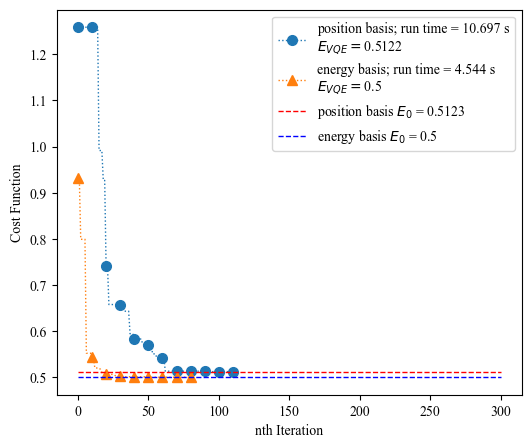

C:\Users\johns\anaconda3\envs\qiskit\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


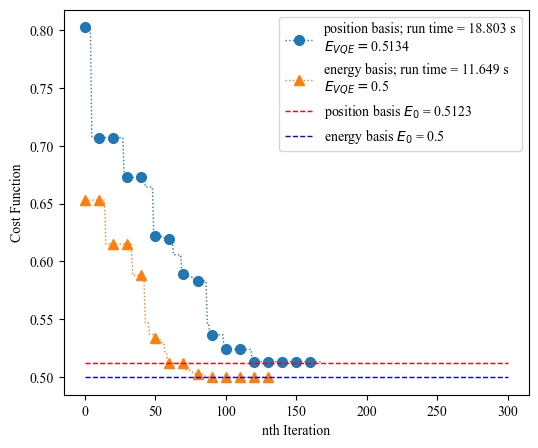

C:\Users\johns\anaconda3\envs\qiskit\Lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


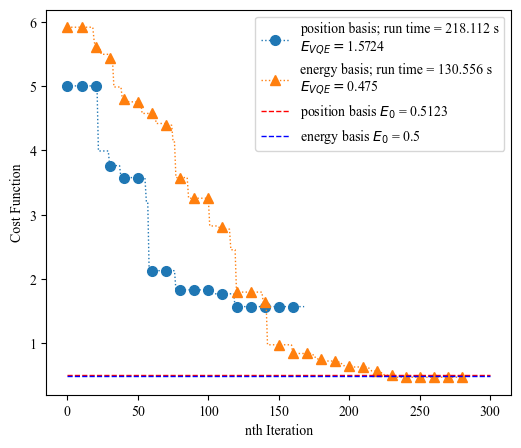

In [9]:
def shortList(path, msize, basis):
    """Grab a short list of accurate ground states"""
    vals, vecs = np.linalg.eig(QHO(msize,basis))
    exact = np.sort(vals)[0]
    
    df = pd.read_csv(path)
    header1 = df.columns.values[1]
    header2 = df.columns.values[2]

    acc = 50
    for i in range(len(df[header1])):
        removebracks = df[header1][i].replace("[","").replace("]","")
        mylist = removebracks.split()
        numlist = [float(i) for i in mylist]
        run_time = float(df[header2][i])

        if abs(numlist[-1] - exact) < acc:
            acc = abs(numlist[-1] - exact)
            slvals = []
            sltimes = []
            slvals.append(numlist)
            sltimes.append(run_time)
        elif abs(numlist[-1] - exact) == acc:
            slvals.append(numlist)
            sltimes.append(run_time)
    return slvals, sltimes, exact

def graphComp(path_en,path_pos,msize,imgpath):
    """Graph most accurate run with shortest no. of iterations"""
    
    slvalsen, sltimesen, exacten = shortList(path_en,4,"en")
    slvalspos, sltimespos, exactpos = shortList(path_pos,4,"pos")
    maxlen = 300
    for i in range(len(slvalsen)):
        if len(slvalsen[i]) < maxlen:
            tographen = []
            maxlen = len(slvalsen[i])
            tographen.append(slvalsen[i])
            tographen.append(sltimesen[i])
    maxlen = 300
    for i in range(len(slvalspos)):
        if len(slvalspos[i]) < maxlen:
            tographpos = []
            maxlen = len(slvalspos[i])
            tographpos.append(slvalspos[i])
            tographpos.append(sltimespos[i])
    
    fig, ax = plt.subplots(1, 1, figsize=(6,5))
    ax.plot(range(0,len(tographpos[0])),tographpos[0],marker="o", markersize = 7,
            markevery=10, linewidth = 1, linestyle = 'dotted')
    ax.plot(range(0,len(tographen[0])),tographen[0],marker="^", markersize = 7,
            markevery=10, linewidth = 1, linestyle = 'dotted')
    ax.plot((0,300),(exactpos,exactpos),color='red', linewidth = 1,
            linestyle="dashed")
    ax.plot((0,300),(exacten,exacten),color='blue', linewidth = 1,
            linestyle="dashed")
    ax.set_ylabel("Cost Function")
    ax.set_xlabel("nth Iteration")
    ax.legend(["position basis; run time = "+str(round(tographpos[1],3)) 
               + " s\n" r"$E_{VQE} = $" + str(np.round(tographpos[0][-1],4)),
               "energy basis; run time = "+str(round(tographen[1],3)) 
               + " s\n" r"$E_{VQE} = $" + str(np.round(tographen[0][-1],4)),
               "position basis "+ r"$E_0$ = "+str(np.real(np.round(exactpos,4))),
               "energy basis " + r"$E_0$ = "+str(exacten)],loc='best')
    plt.savefig(imgpath, dpi=600)
    plt.show()
            

def countConv(path, basis):
    """Count number of minimized runs to check for consistency"""
    if basis == 'en':
        conv = 0.5
    elif basis == 'pos':
        conv = 0.52 #more tolerance

    df = pd.read_csv(path)
    header1 = df.columns.values[1]

    count = 0
    count_anoms = 0
    for i in range(len(df[header1])):
        removebracks = df[header1][i].replace("[","").replace("]","")
        mylist = removebracks.split()
        numlist = [float(i) for i in mylist]
        
        if np.sort(numlist)[0] <= conv:
            count += 1
        if len(numlist) == 200:
            count_anoms += 1
    print(count_anoms)
    return count

# Generating graphs
mypathen1 = "genData/2QHEAEnBasis.csv"
mypathpos1 = "genData/2QHEAPosBasis.csv"
imgpath1  ="genFigs/2QHEA.png"
graphComp(mypathen1,mypathpos1,4,imgpath1)

mypathen2 = "genData/2QUAEnBasis.csv"
mypathpos2 = "genData/2QUAPosBasis.csv"
imgpath2  ="genFigs/2QUA.png"
graphComp(mypathen2,mypathpos2,4,imgpath2)

mypathen3 = "genData/4QHEAEnBasis.csv"
mypathpos3 = "genData/4QHEAPosBasis.csv"
imgpath3  ="genFigs/4QHEA.png"
graphComp(mypathen3,mypathpos3,4,imgpath3)

In [4]:
# Generating circuit images
Two_QHEACirc = QuantumCircuit(2,2)
Two_Qubit_HEA(Two_QHEACirc, [Parameter(r"$\theta$"+str(i)) for i in range(8)])
Two_QUACirc = QuantumCircuit(2,2)
Two_Qubit_UniversalAnsatz(Two_QUACirc, [Parameter(r"$\theta$"+str(i)) for i in range(16)])
Four_QHEACirc = QuantumCircuit(4,4)
Four_Qubit_HEA(Four_QHEACirc, [Parameter(r"$\theta$"+str(i)) for i in range(16)])

Two_QHEACirc.draw('mpl').savefig("genFigs/2QHEACirc.png", dpi = 600)
Two_QUACirc.draw('mpl').savefig("genFigs/U2QACirc.png", dpi = 600)
Four_QHEACirc.draw('mpl').savefig("genFigs/4QHEACirc.png", dpi = 600)

# Example circuit for HEA
qc = QuantumCircuit(2,2)
params = [Parameter(r"$\theta$"+str(i)) for i in range(16)]
qc.ry(params[0], 0)
qc.rz(params[1], 0)
qc.ry(params[2], 1)
qc.rz(params[3], 1)
qc.cx(0,1)
qc.ry(params[4], 0)
qc.rz(params[5], 0)
qc.ry(params[6], 1)
qc.rz(params[7], 1)
qc.cx(0,1)
qc.ry(params[8], 0)
qc.rz(params[9], 0)
qc.ry(params[10], 1)
qc.rz(params[11], 1)
qc.cx(0,1)
qc.ry(params[12], 0)
qc.rz(params[13], 0)
qc.ry(params[14], 1)
qc.rz(params[15], 1)
qc.draw('mpl').savefig("genFigs/2QHEA_3ent.png", dpi = 600)

C:\Users\johns\AppData\Roaming\Python\Python311\site-packages\qiskit\visualization\circuit\matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)
